# Distribution Plots for Figure 1 and Supplemental Figure 1

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import Levenshtein as Lev
import statsmodels.discrete.discrete_model as dm
import scipy.optimize
import scipy.stats as st

import os
import warnings
from datetime import datetime

# Load in custom functions
from MM_functions import model_fit_functions as ff

# Edit to reflect your own repository location
path = 'C:/Users/perry/github_repos/mixed_model_denoising/'
os.chdir(path)

date = datetime.today().strftime('%Y-%m-%d')
print(date)

2023-10-03


### Loading data

In [84]:
# Loading in files from preprocessing notebook into dictionary

donor_files = os.listdir('./data/processed/donor_cells')
donor_file_dict = dict(zip(list(range(1,len(donor_files) + 1)), donor_files))

donor_dfs = {}
donor_sizes = {}
donor_sars2 = {}

for donor in donor_file_dict:
    donor_df = pd.read_csv('./data/processed/donor_cells/' + donor_file_dict[donor], sep = ',', index_col=0)
    donor_sizes[donor] = len(donor_df)
    donor_dfs[donor] = donor_df
    donor_sars2[donor] = donor_df['SARS-2']

In [90]:
# Loading in files from preprocessing notebook into dictionary

vrc01_files = os.listdir('./data/processed/vrc01_cells')
vrc01_file_dict = dict(zip(list(range(1,len(vrc01_files) + 1)), vrc01_files))

vrc01_dfs = {}
vrc01_sizes = {}
vrc01_sars2 = {}

for donor in vrc01_file_dict:
    vrc01_df = pd.read_csv('./data/processed/vrc01_cells/' + vrc01_file_dict[donor], sep = ',', index_col=0)
    vrc01_sizes[donor] = len(vrc01_df)
    vrc01_dfs[donor] = vrc01_df
    vrc01_sars2[donor] = vrc01_df['SARS-2']

In [70]:
lss_names = [col for col in donor_dfs[1].columns if '.LSS' in col]
umi_names = [i.split('.')[0] for i in lss_names]

Fig. 1e

In [71]:
ratio_df = pd.DataFrame([vrc01_sizes, donor_sizes]).T
ratio_df.columns = ['VRC01', 'Donor']

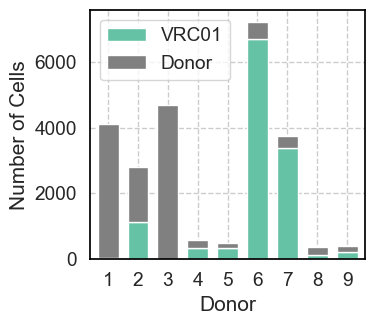

In [159]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(4,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

ax = ratio_df.plot.bar(stacked=True, width=0.7 ,color=[sns.color_palette()[0], 'grey']) #
plt.ylabel('Number of Cells')
plt.xlabel('Donor')
plt.xticks(rotation=0)

# plt.ylim(0,7200)

plt.tight_layout()
plt.savefig('fig2e.svg')

### Looking at Donor 2 for Figure 1

In [73]:
donor_df, vrc01_df = donor_dfs[2], vrc01_dfs[2]

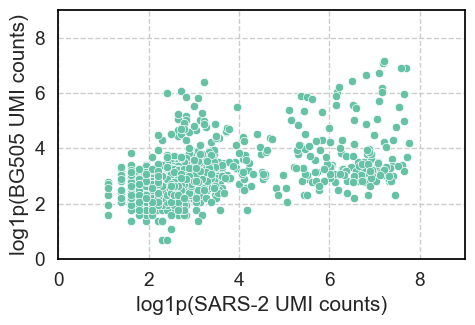

In [74]:
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.scatterplot(x=np.log1p(donor_df['SARS-2']), y=np.log1p(donor_df['BG505_sc']))
plt.xlim(0,9)
plt.ylim(0,9)

plt.xlabel('log1p(SARS-2 UMI counts)')
plt.ylabel('log1p(BG505 UMI counts)')

plt.tight_layout()

plt.savefig('fig2c.svg')

In [75]:
np.corrcoef(np.log1p(donor_df['SARS-2']), np.log1p(donor_df['BG505_sc']))

array([[1.        , 0.48176559],
       [0.48176559, 1.        ]])

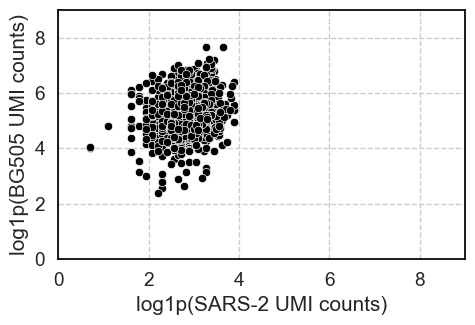

In [76]:
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.scatterplot(x=np.log1p(vrc01_df['SARS-2']), y=np.log1p(vrc01_df['BG505_sc']), color='black')
plt.xlim(0,9)
plt.ylim(0,9)

plt.xlabel('log1p(SARS-2 UMI counts)')
plt.ylabel('log1p(BG505 UMI counts)')

plt.tight_layout()

plt.savefig('fig2d.svg')

In [77]:
np.corrcoef(np.log1p(vrc01_df['SARS-2']), np.log1p(vrc01_df['BG505_sc']))

array([[1.        , 0.20806994],
       [0.20806994, 1.        ]])

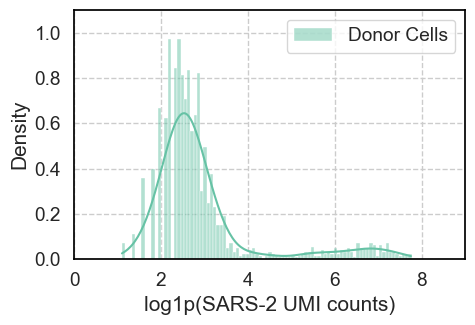

In [78]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.histplot(np.log1p(donor_df['SARS-2']), binwidth=0.075, stat='density', label = 'Donor Cells', color = sns.color_palette()[0], kde=True, bins=500)
plt.legend()
plt.xlabel('log1p(SARS-2 UMI counts)')
plt.xlim(0,9)
plt.ylim(0,1.1)

plt.tight_layout()

plt.savefig('fig2a.svg')

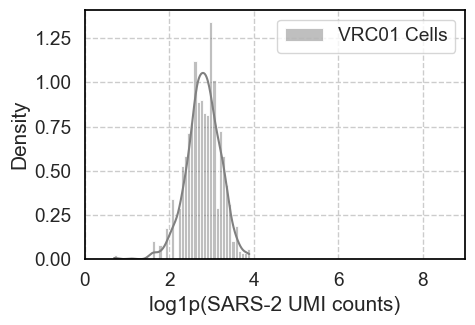

In [81]:
# Setting default figure parameters
sns.set(rc = {'figure.figsize':(5,3.5)}, font_scale=1.25, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.histplot(np.log1p(vrc01_df['SARS-2']), binwidth=0.075, color='grey', stat='density', label = 'VRC01 Cells', kde=True)
plt.legend()
plt.xlim(0,9)
plt.xlabel('log1p(SARS-2 UMI counts)')

plt.tight_layout()

plt.savefig('fig2b.svg')

In [99]:
sars2_df_donor = pd.DataFrame(donor_sars2)
sars2_df_donor = np.log1p(sars2_df_donor)

In [105]:
sars2_df_vrc01 = pd.DataFrame(vrc01_sars2)
sars2_df_vrc01.drop(3, axis=1, inplace=True)
sars2_df_vrc01 = np.log1p(sars2_df_vrc01)

In [112]:
sars2_df_donor = pd.DataFrame(donor_sars2)
sars2_df_donor = np.log1p(sars2_df_donor)
sars2_df_donor = sars2_df_donor.melt()
sars2_df_donor['Cell type'] = 'Donor'

sars2_df_vrc01 = pd.DataFrame(vrc01_sars2)
sars2_df_vrc01.drop(3, axis=1, inplace=True)
sars2_df_vrc01 = np.log1p(sars2_df_vrc01)
sars2_df_vrc01 = sars2_df_vrc01.melt()
sars2_df_vrc01['Cell type'] = 'VRC01'

sars2_df = pd.concat([sars2_df_donor, sars2_df_vrc01])

In [140]:
sars2_df

,variable,value,Cell type
0,1,NaN,Donor
1,1,1.386294,Donor
2,1,NaN,Donor
3,1,NaN,Donor
4,1,2.944439,Donor
...,...,...,...
98027,9,NaN,VRC01
98028,9,NaN,VRC01
98029,9,NaN,VRC01
98030,9,NaN,VRC01


In [141]:
sars2_df = sars2_df[sars2_df['Cell type'] == 'Donor']

In [154]:
sns.palettes.get_color_cycle()[0]

(0.4, 0.7607843137254902, 0.6470588235294118)

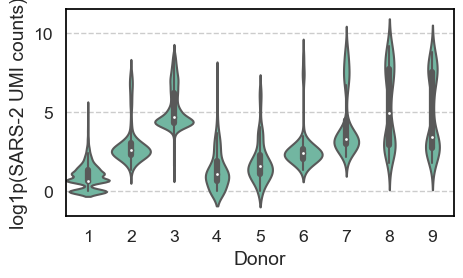

In [158]:
sns.set(rc = {'figure.figsize':(5,3)}, font_scale=1.15, palette='Set2', font="Arial" )
sns.set_style("whitegrid", { "ytick.major.size": 0.1, "ytick.minor.size": 0.05, 'grid.linestyle': '--', 'axes.edgecolor': 'black', 'axes.spines.right': True, 'axes.spines.top': True})

sns.violinplot(data = sars2_df, x ='variable', y='value', width=1,scale="area", dodge=True, gap=5.2, color=sns.palettes.get_color_cycle()[0])

plt.xlabel('Donor')
plt.ylabel('log1p(SARS-2 UMI counts)')
# sns.violinplot(data = sars2_df, x ='variable', y='value', hue='Cell type', split=True, width=1,scale="area", dodge=True, gap=5.2)

plt.tight_layout()
plt.savefig('fig1_violin.svg')